Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.

Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
обработку пропусков в данных;
кодирование категориальных признаков;
масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
#загружаем датасет
data=pd.read_csv('videogamesales.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(16598, 11)

In [4]:
# типы колонок
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16598


In [8]:
#1. Выполняем обработку пропусков в данных: 
#1.1. Удаление или заполнение нулями.

#Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16598, 11), (16598, 9))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16598, 11), (16291, 11))

In [10]:
# Первые 5 строк датасета
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
#1.2. Выполняем обработку пропусков в данных: "Внедрение значений" - импьютация (imputation)
#1.2.1. Обработка пропусков в числовых данных

# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Year. Тип данных float64. Количество пустых значений 271, 1.63%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0
5,1989.0
6,2006.0
7,2006.0
8,2009.0
9,1984.0


In [14]:
# Фильтр по пустым значениям поля Year
data[data['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [15]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([  179,   377,   431,   470,   607,   624,   649,   652,   711,
              782,
            ...
            16191, 16194, 16198, 16229, 16246, 16307, 16327, 16366, 16427,
            16493],
           dtype='int64', length=271)

In [16]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [17]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Year']

179     NaN
377     NaN
431     NaN
470     NaN
607     NaN
624     NaN
649     NaN
652     NaN
711     NaN
782     NaN
1126    NaN
1133    NaN
1303    NaN
1433    NaN
1498    NaN
1513    NaN
1585    NaN
1649    NaN
1697    NaN
1837    NaN
1990    NaN
2019    NaN
2086    NaN
2113    NaN
2114    NaN
2134    NaN
2145    NaN
2173    NaN
2286    NaN
2295    NaN
         ..
15197   NaN
15208   NaN
15261   NaN
15316   NaN
15476   NaN
15579   NaN
15606   NaN
15652   NaN
15697   NaN
15717   NaN
15739   NaN
15811   NaN
15865   NaN
15876   NaN
15878   NaN
15900   NaN
15915   NaN
16057   NaN
16058   NaN
16065   NaN
16191   NaN
16194   NaN
16198   NaN
16229   NaN
16246   NaN
16307   NaN
16327   NaN
16366   NaN
16427   NaN
16493   NaN
Name: Year, Length: 271, dtype: float64

In [18]:
#Будем использовать встроенные средства импьютации библиотеки scikit-learn - 
#https://scikit-learn.org/stable/modules/impute.html#impute

data_num_Year = data_num[['Year']]
data_num_Year.head()

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [20]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Year)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [21]:
#С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения

strategies=['mean','median','most_frequent']

In [22]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Year)
    return data_num_imp[mask_missing_values_only]

In [23]:
strategies[0], test_num_impute(strategies[0])

('mean', array([2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 20

In [24]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 20

In [25]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 20

In [26]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [27]:
data[['Year']].describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [28]:
test_num_impute_col(data, 'Year', strategies[0])

('Year', 'mean', 271, 2006.4064433147546, 2006.4064433147546)

In [29]:
test_num_impute_col(data, 'Year', strategies[1])

('Year', 'median', 271, 2007.0, 2007.0)

In [30]:
test_num_impute_col(data, 'Year', strategies[2])

('Year', 'most_frequent', 271, 2009.0, 2009.0)

In [31]:
# 1.2.2. Обработка пропусков в категориальных данных

# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Publisher. Тип данных object. Количество пустых значений 58, 0.35%.


In [32]:
cat_temp_data = data[['Publisher']]
cat_temp_data.head()

,Publisher
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo


In [33]:
cat_temp_data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [55]:
cat_temp_data[cat_temp_data['Publisher'].isnull()].shape

(58, 1)

In [56]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Nintendo'],
       ['Nintendo'],
       ['Nintendo'],
       ...,
       ['Activision'],
       ['7G//AMES'],
       ['Wanadoo']], dtype=object)

In [57]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

In [58]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Nintendo'],
       ['Nintendo'],
       ['Nintendo'],
       ...,
       ['Activision'],
       ['7G//AMES'],
       ['Wanadoo']], dtype=object)

In [59]:
# Пустые значения отсутствуют - 2
np.unique(data_imp3)

array(['!!!', '10TACLE Studios', '1C Company',
       '20th Century Fox Video Games', '2D Boy', '3DO', '49Games',
       '505 Games', '5pb', '7G//AMES', '989 Sports', '989 Studios',
       'AQ Interactive', 'ASC Games', 'ASCII Entertainment',
       'ASCII Media Works', 'ASK', 'Abylight', 'Acclaim Entertainment',
       'Accolade', 'Ackkstudios', 'Acquire', 'Activision',
       'Activision Blizzard', 'Activision Value', 'Adeline Software',
       'Aerosoft', 'Agatsuma Entertainment', 'Agetec', 'Aksys Games',
       'Alawar Entertainment', 'Alchemist', 'Alternative Software',
       'Altron', 'Alvion', 'American Softworks', 'Angel Studios',
       'Answer Software', 'Aqua Plus', 'Aques', 'Arc System Works',
       'Arena Entertainment', 'Aria', 'Arika', 'ArtDink', 'Aruze Corp',
       'Ascaron Entertainment', 'Ascaron Entertainment GmbH', 'Asgard',
       'Asmik Ace Entertainment', 'Asmik Corp', 'Aspyr', 'Astragon',
       'Asylum Entertainment', 'Atari', 'Athena', 'Atlus',
       'Aval

In [60]:
data_imp3[data_imp3=='!!!'].size

58

22222222222222222222222222222222222222222222222222222222222222222222222222222

Преобразование категориальных признаков в числовые

In [61]:
#2.Преобразование категориальных признаков в числовые

cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo
5,Nintendo
6,Nintendo
7,Nintendo
8,Nintendo
9,Nintendo


2.1. Кодирование категорий целочисленными значениями - label encoding

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [63]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [64]:
cat_enc['c1'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [65]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [66]:
le.inverse_transform([0, 1, 2, 3])

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy'], dtype=object)

2.2. Кодирование категорий наборами бинарных значений - one-hot encoding

In [67]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [68]:
cat_enc.shape

(16598, 1)

In [69]:
cat_enc_ohe.shape

(16598, 578)

In [70]:
cat_enc_ohe

<16598x578 sparse matrix of type '<class 'numpy.float64'>'
	with 16598 stored elements in Compressed Sparse Row format>

In [71]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
cat_enc.head(10)

,c1
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo
5,Nintendo
6,Nintendo
7,Nintendo
8,Nintendo
9,Nintendo


In [73]:
# Pandas get_dummies - быстрый вариант one-hot кодирования

pd.get_dummies(cat_enc).head()

,c1_10TACLE Studios,c1_1C Company,c1_20th Century Fox Video Games,c1_2D Boy,c1_3DO,c1_49Games,c1_505 Games,c1_5pb,c1_7G//AMES,c1_989 Sports,...,c1_Zushi Games,c1_bitComposer Games,c1_dramatic create,c1_fonfun,c1_iWin,c1_id Software,c1_imageepoch Inc.,c1_inXile Entertainment,"c1_mixi, Inc",c1_responDESIGN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,Publisher_3DO,Publisher_49Games,Publisher_505 Games,Publisher_5pb,Publisher_7G//AMES,Publisher_989 Sports,...,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN,Publisher_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#3 - Масштабирование данных

#Термины "масштабирование" и "нормализация" часто используются как синонимы. 
#Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [86]:
#MinMax масштабирование

# типы колонок
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [99]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['JP_Sales']])

C:\foruniver\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


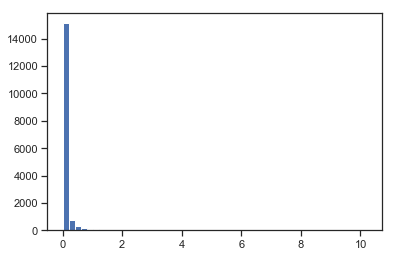

In [102]:
plt.hist(data['JP_Sales'], 50)
plt.show()

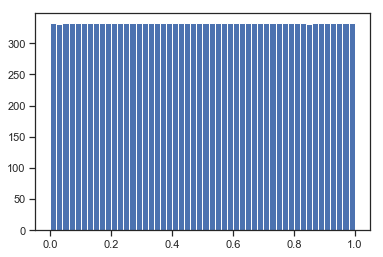

In [103]:
plt.hist(sc1_data, 50)
plt.show()

In [104]:
#3.2. Масштабирование данных на основе Z-оценки - StandardScaler

sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['JP_Sales']])

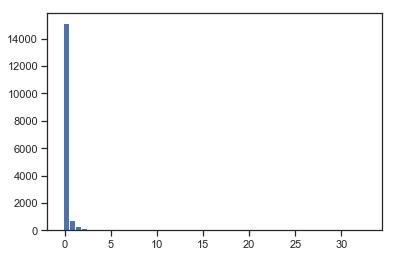

In [109]:
plt.hist(sc2_data, 50)
plt.show()

In [110]:
# 3.3. Нормализация данных
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['JP_Sales']])

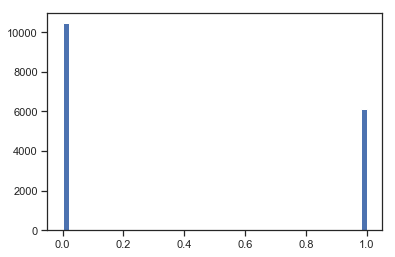

In [111]:
plt.hist(sc3_data, 50)
plt.show()